                dry_bulb_faren
dry_bulb_faren             1.0


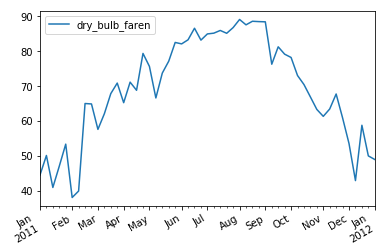

In [1]:
# add items hidden by DataCamp
datafile = 'DataSets/NOAA_QCLCD_2011_hourly_13904.csv'
import pandas as pd
df = pd.read_csv(datafile)
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
column_labels_list = column_labels.split(',')
df.columns = column_labels_list
df_dropped = df.drop(list_to_drop, axis='columns')
df_dropped['date'] = df_dropped['date'].astype(str)
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))
date_string = df_dropped['date'] + df_dropped['Time']
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')
df_clean = df_dropped.set_index(date_times)
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')
# BL - need to add climate data which is something new and never mentioned yet in the course...
df_climate = pd.read_csv('DataSets/weather_data_austin_2010.csv')
# BL - need to convert the df_climate field to date time
df_climate['Date'] = pd.to_datetime(df_climate['Date'].astype(str), format='%Y%m%d %H:%M')
df_climate.set_index(df_climate['Date'], inplace=True)
#############



# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr() )

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()
